#  Data Science :
Short Definition:
- `Data Driven Decision Making`

## =>Data Wrangling By Applying the ```Machine Learning``` Algorithms and Statistics
What is Data Wrangling?

Data wrandling is the process of `cleaning` , `transformation, and organizing` data so that it can be used for ` analysis and visualization`. It is an important step in the data analysis process because raw data is often incomplete, inconsistent, and in an unstructured format, which can make it difficult to work with. 
- Data wrangling helps to makke the data more `consistent`, `accutate` , and `useful` for analysis and decision makin.

### Steps:
1. Gathering Data (kia) - Libraries
2. Tools to clean data (kis se clean karei) - Libraries
3. How to do , kaisay (steps)

In [2]:
# libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# 1- Removing Missing Values:

In [6]:
wrangled_df = df

In [7]:
wrangled_df= wrangled_df.drop(columns= 'deck')
''' or we can also write the following code
wrangled_df.drop(columns='deck', Inplace = True)
'''


" or we can also write the following code\nwrangled_df.drop(columns='deck', Inplace = True)\n"

In [8]:
wrangled_df['age'] = wrangled_df.age.fillna(value = wrangled_df['age'].mean())

In [9]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

# 2- Fill Missing Values:

In [10]:
wrangled_df['embarked'] = wrangled_df.embarked.fillna(wrangled_df['embarked'].mode()[0])

In [11]:
wrangled_df.isnull().sum() / len(df) * 100 

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [12]:
wrangled_df['embark_town'] = wrangled_df.embark_town.fillna(wrangled_df['embark_town'].mode()[0])

In [13]:
wrangled_df.isnull().sum() / len(wrangled_df) * 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# 3- Removing Outliers:

<Axes: xlabel='sex', ylabel='age'>

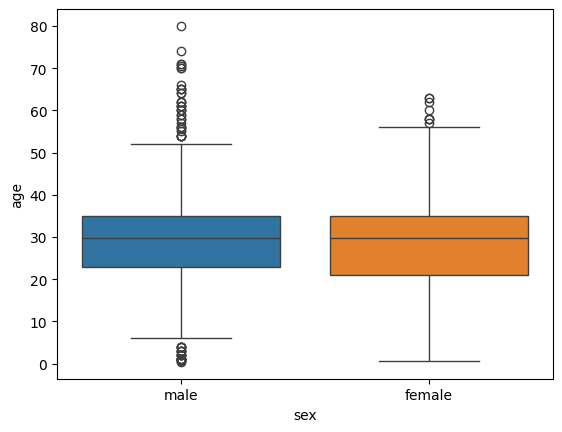

In [14]:
sns.boxplot(wrangled_df, x='sex', y='age', hue= 'sex')

## Method 1: IQR (Inter Quantile Range):

In [15]:
# IQR method (Inter Quantile region)
Q1= wrangled_df["age"].quantile(0.25)
Q3= wrangled_df["age"].quantile(0.75)
IQR = Q3 = Q1
IQR
lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

wrangled_df = wrangled_df[(wrangled_df['age']>lower_bound)&(df['age']<upper_bound)]
wrangled_df.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


now checking if the outliers are removed or not?


In [16]:
wrangled_df.shape # we removed all the outliers, of age

(672, 14)

<Axes: xlabel='sex', ylabel='fare'>

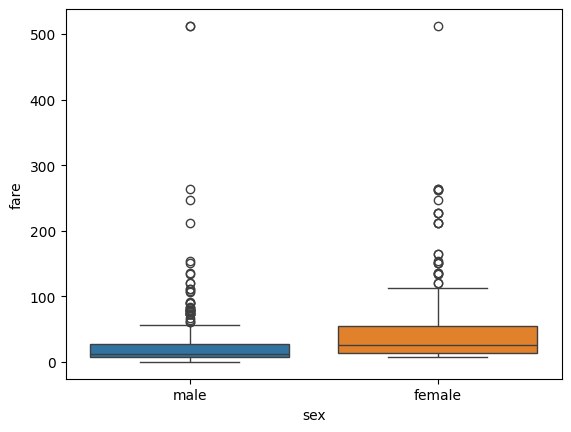

In [17]:
sns.boxplot(wrangled_df, x='sex', y='fare', hue= 'sex')

<Axes: xlabel='fare', ylabel='Count'>

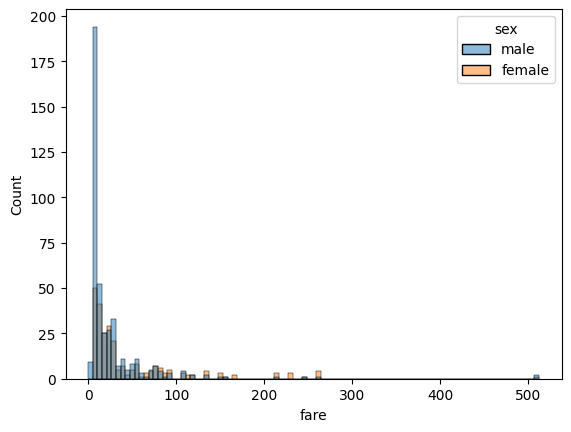

In [18]:
sns.histplot(wrangled_df, x='fare',hue= 'sex')

In [19]:
# IQR method (Inter Quantile region)
Q1= wrangled_df["fare"].quantile(0.25)
Q3= wrangled_df["fare"].quantile(0.75)
IQR = Q3 = Q1
IQR
lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

wrangled_df = wrangled_df[(wrangled_df['fare']>lower_bound)&(wrangled_df['fare']<upper_bound)]
wrangled_df.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,Southampton,yes,False


<Axes: xlabel='fare', ylabel='Count'>

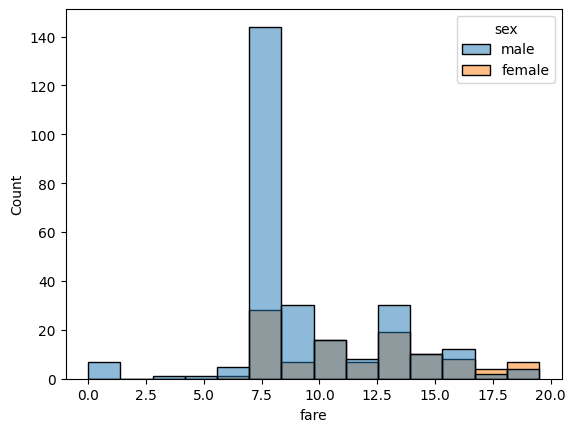

In [20]:
sns.histplot(wrangled_df, x='fare',hue= 'sex')


In [21]:
wrangled_df.shape

(377, 14)

## Method 2: Z-Score Method:

In [22]:
# z-score method:
from scipy import stats
df_outliers_removed_zscore_method = df
zscore = np.abs(stats.zscore(df_outliers_removed_zscore_method['age']))
threshold = 3
df_outliers_removed_zscore_method = df_outliers_removed_zscore_method[(z<threshold).all(axis=1)]

NameError: name 'z' is not defined

**#Assignment :** I have to correct the above code, and understand its concept.

# 4- Finding and Droping Duplicates:

## 1_Finding Duplicates:

In [ ]:
wrangled_df.duplicated()

0      False
2      False
4      False
8      False
10     False
       ...  
882    False
883    False
884     True
886     True
890    False
Length: 377, dtype: bool

In [ ]:
wrangled_df.duplicated().sum()

33

wrong answer or values from below code

In [ ]:
df_duplicate = wrangled_df[wrangled_df.duplicated()]
df_duplicate.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
173,0,3,male,21.0,0,0,7.9250,S,Third,man,True,Southampton,no,True
213,0,2,male,30.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
313,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,Southampton,no,True
343,0,2,male,25.0,0,0,13.0000,S,Second,man,True,Southampton,no,True


In [ ]:
df_duplicate.shape

(33, 14)

<BarContainer object of 2 artists>

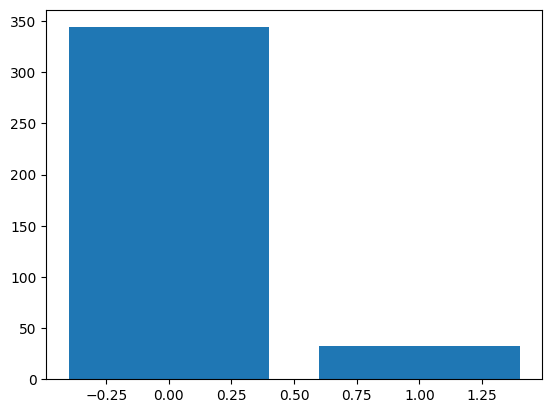

In [ ]:
df_duplicate = wrangled_df.duplicated()
df_duplicate_count = df_duplicate.value_counts()

plt.bar(df_duplicate_count.index, df_duplicate_count)

## 2_Removing Duplicates:

In [ ]:

wrangled_df.drop_duplicates(inplace=True)

In [ ]:
wrangled_df.shape

(344, 14)

In [ ]:
# pip install scikit-learn

# **5-Transforming the Data:**
## ==>**1-Normalize the Data:**
### ------------>**1_MinMaxScaler Method:**

#### --------------------------->**1_Import Libraries**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#### --------------------------->**2_data:**

In [ ]:
wrangled_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,3,male,20.0,0,0,9.8458,S,Third,man,True,Southampton,no,True
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,Southampton,no,True


#### --------------------------->**3_Select the columns to normalize**

In [ ]:
cols_to_normalize = ['age','fare']

#### --------------------------->**4_Create the scaler function/tool:**

In [ ]:
scaler = MinMaxScaler()

#### --------------------------->**5_ Fit and Transform the data on the scaler or vice versa:**

In [ ]:
wrangled_df[cols_to_normalize] = scaler.fit_transform(wrangled_df[cols_to_normalize])

In [ ]:
# check the data
wrangled_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.402762,1,0,0.371795,S,Third,man,True,Southampton,no,False
2,1,3,female,0.477417,0,0,0.406410,S,Third,woman,False,Southampton,yes,True
4,0,3,male,0.645390,0,0,0.412821,S,Third,man,True,Southampton,no,True
8,1,3,female,0.496081,0,2,0.570938,S,Third,woman,False,Southampton,yes,False
10,1,3,female,0.066816,1,1,0.856410,S,Third,child,False,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,3,male,0.365435,0,0,0.504913,S,Third,man,True,Southampton,no,True
881,0,3,male,0.608063,0,0,0.404913,S,Third,man,True,Southampton,no,True
882,0,3,female,0.402762,0,0,0.539318,S,Third,woman,False,Southampton,no,True
883,0,2,male,0.514744,0,0,0.538462,S,Second,man,True,Southampton,no,True


In [ ]:
wrangled_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.308140,2.761628,0.491749,0.226744,0.162791,0.514653
std,0.462397,0.453215,0.197009,0.535378,0.467247,0.184993
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.365435,0.000000,0.000000,0.398718
50%,0.000000,3.000000,0.477417,0.000000,0.000000,0.429915
75%,1.000000,3.000000,0.608063,0.000000,0.000000,0.666667
max,1.000000,3.000000,1.000000,4.000000,3.000000,1.000000


### ------------>**2_Standard Scaler:**

yahi kaam ham standard scaler ke lia bhi kar saktei hai ye `assignment me baqi normalization techniques alag notebook me karna hai mene`
aur dusra kaam ho karna hai wo ye hai ke

` standard scaler kya hai? aur iski range kya hoti hai?`

x_stand = (x-mean(x)) / std(x)

Where :

x_stand is the standardized variable

x is the orignal variable

mean(x) is the mean of the variable x

std(x) is the standard deviation of variable x

### ------------>**3_Log Transformation:**

In [ ]:
kashti = sns.load_dataset('titanic')

In [ ]:
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


---
pehle ham `log transform kartei hai `uske baad 

phir `outliers remove kartei hai `,

kyuke 80 saal ka koi aik banda ho to wo outlier to na hwa na, banda to mojud tha, kisi khambe ko to ham ne 80 saal ka burha nahi kaha

---

In [ ]:
kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# log transform

kashti["age"] = np.log(kashti["age"])
kashti['fare'] = np.log(kashti["fare"])
kashti.head()

/home/anony_khan/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


uper ham ne log liya hai,

agr 0 ke qareeb values zyada hai data mei to ham waha ` log ` ki bajeay `log1p` use karei ge

<Axes: xlabel='sex', ylabel='fare'>

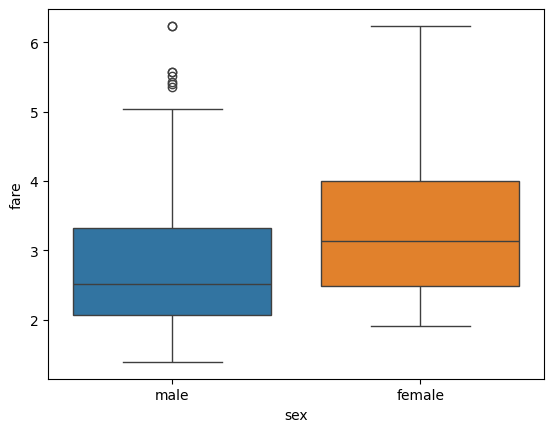

In [ ]:
sns.boxplot(data=kashti, x='sex',y='fare', hue='sex')

---

age ka bhera gharq ho gaya log transformation kar ke , matlab ye hwa ke `age ` ke lia ham koi dusra method use karei ge data normalization ka.

<Axes: xlabel='sex', ylabel='age'>

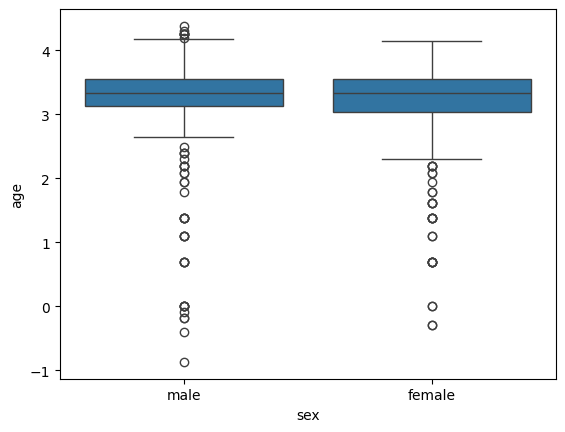

In [ ]:
sns.boxplot(data= kashti, x='sex', y='age')

<Axes: xlabel='age', ylabel='Count'>

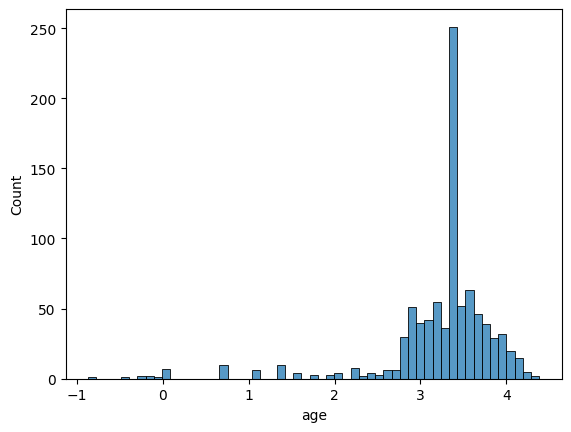

In [ ]:
sns.histplot(kashti, x='age')

iska matlab ye hwa ke log transformation method hamare `age` ke data ko khaarab karta hai

---

**Age without using log transformation**

<Axes: xlabel='age', ylabel='Count'>

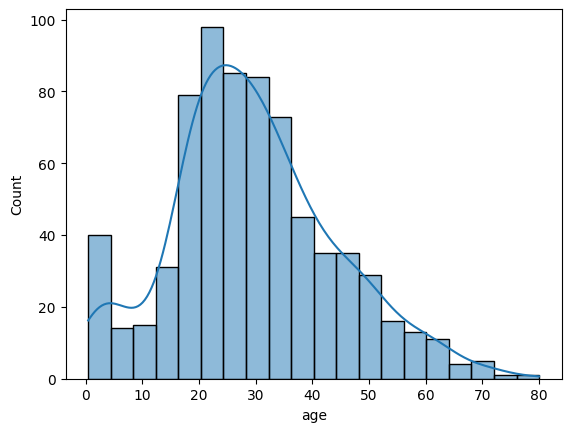

In [ ]:
age_data=df
sns.histplot(age_data, x='age', kde=1)

# **6-Organizing The Data:**

## ===>**1_Creating a Column:**

In [ ]:
kashti['family_size'] = kashti['sibsp'] + kashti['parch']

In [ ]:
kashti.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'family_size'],
      dtype='object')

uper column `family_size` add ho gaya hai

---

<Axes: xlabel='family_size', ylabel='Count'>

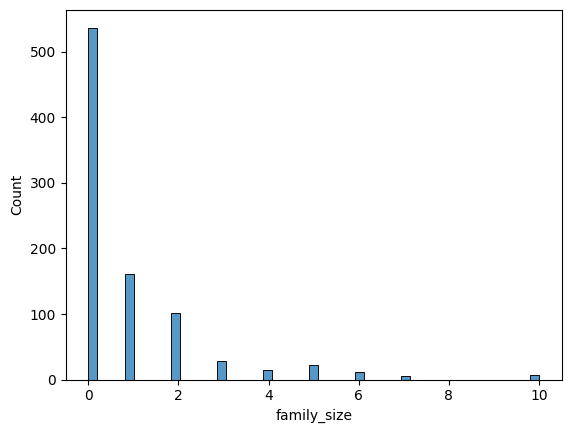

In [ ]:
sns.histplot(kashti['family_size'])

/home/anony_khan/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 67.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anony_khan/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='family_size'>

/home/anony_khan/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anony_khan/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


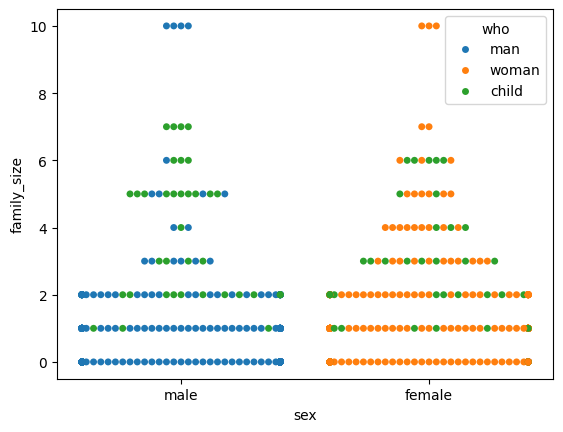

In [ ]:
sns.swarmplot(kashti, x='sex',y='family_size', hue= 'who')

## ===> **2_Renaming Jis Se sense bane:**

In [ ]:
df_renamed = df.rename(columns={'survived' : 'Zinda rahe'})
df_renamed.head()

,Zinda rahe,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## ===> **3_Creating Pivot Table:**

In [ ]:
table = pd.pivot_table(wrangled_df,values= 'fare',  index= 'who', columns='survived',aggfunc=np.mean)
table

/tmp/ipykernel_2757/2929440710.py:1: FutureWarning: The provided callable <function mean at 0x7fc48c604310> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(wrangled_df,values= 'fare',  index= 'who', columns='survived',aggfunc=np.mean)


survived,0,1
who,,
child,0.632764,0.702602
man,0.466575,0.456417
woman,0.571348,0.599883


# **7-Saving the Data:**

In [ ]:
import pandas as pd

In [23]:
try:
    wrangled_df.to_excel("wrangled.xlsx")
except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
# pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 394.1 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
